In [1]:
import sys
import os
sys.path.insert(0,'../classes')
sys.path.insert(0,'../analysis')
import anl

sys.path.insert(0,'/home/zz737/projects/fiar/cog_model/fourinarow/Analysis notebooks/new')
hqfd = '/home/zz737/projects/fiar/cog_model/fourinarow/Analysis notebooks/new/Heuristic quality'
sys.path.insert(0,hqfd)
from fourinarowfunctions import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import logging
import numpy as np

import coloredlogs

from arena import Arena
from coach import Coach
from beck.beck_game import BeckGame as Game
from beck.beck_nnet import NNetWrapper as nn
from beck.beck_players import HumanBeckPlayer
from mcts import MCTS
from utils import *
log = logging.getLogger(__name__)

from keras import backend as K

import tournament
# participant_iters = tournament.participant_iters

participants_dir = '/scratch/zz737/fiar/tournaments/tournament_4' # dir for trained networks
results_dir = '/scratch/zz737/fiar/tournaments/results/tournament_4'
moves_dir = '/scratch/zz737/fiar/tournaments/tournament_4/moves/raw/'
splits_dir = '/scratch/zz737/fiar/tournaments/tournament_4/moves/splits/'

import load
import plot_fun
from importlib import reload
reload(load)

{'mcts100_cpuct1': [1, 2, 3, 4, 6, 7, 9, 11, 12, 16, 18, 21, 25, 28, 29, 30, 37, 38, 39, 45, 47], 'mcts100_cpuct2': [1, 2, 3, 4, 6, 8, 12, 14, 15, 16, 21, 22, 24, 26, 27, 30, 32, 35, 39], 'mcts100_cpuct3': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 16, 17, 18, 20, 21, 25, 26, 28, 32, 34, 35, 36], 'mcts25_cpuct1': [1, 2, 3, 4, 9, 11, 13, 14, 16, 19, 22, 25, 28, 29, 31, 37, 39, 45, 59, 61], 'mcts50_cpuct1': [1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 17, 18, 20, 21, 23, 25, 28, 29, 31, 37, 39, 41, 44, 45, 47, 48, 53], 'mcts80_cpuct1': [1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 19, 20, 21, 23, 24, 28, 34, 35, 36, 40], 'mcts80_cpuct2': [1, 2, 5, 6, 8, 10, 12, 13, 15, 17, 18, 19, 22, 25, 28, 30, 31, 34, 37, 38, 39, 40, 43, 45, 46, 51], 'mcts80_cpuct3': [1, 2, 5, 6, 7, 9, 12, 13, 14, 19, 21, 22, 23, 24, 26, 27, 28, 35, 36, 42, 43, 47, 49, 50, 51, 53, 54, 55, 56, 57]}
189 participant iterations!


<module 'load' from '../analysis/load.py'>

In [2]:
hqfd = '/home/zz737/projects/fiar/cog_model/fourinarow/Analysis notebooks/new/Heuristic quality'
move_stats_hvh = np.loadtxt(os.path.join(hqfd,'move_stats_hvh.txt'),dtype=int)
feature_counts = np.loadtxt(os.path.join(hqfd,'optimal_feature_vals.txt'))[:,-35:]
optimal_move_values = np.loadtxt(os.path.join(hqfd,'opt_hvh.txt'))[:,-36:]
optimal_move_values_board = np.loadtxt(os.path.join(hqfd,'opt_hvh.txt'),dtype='object')[:,:2]

In [3]:
g = Game(4, 9, 4)
string_to_int_array = lambda x: (np.array(list(x[0]),dtype=int) -np.array(list(x[1]),dtype=int)).reshape(4,9)
optimal_move_values_board_reshaped_int = np.apply_along_axis(string_to_int_array,1,optimal_move_values_board)

In [4]:
player_color = move_stats_hvh[:,1]
optimal_board_values = np.full_like(player_color,fill_value=np.nan,dtype=float)
optimal_board_values[player_color==0] = np.nanmax(optimal_move_values[player_color==0,:],axis=1)
optimal_board_values[player_color==1] = -np.nanmin(optimal_move_values[player_color==1,:],axis=1)

In [5]:
optimal_move_values_board_reshaped_int[player_color==1] = optimal_move_values_board_reshaped_int[player_color==1] * (-1)

In [6]:
from keras import backend as K
K.clear_session()

In [6]:
participants_dir = '/scratch/zz737/fiar/tournaments/tournament_4/checkpoints_mcts100_cpuct2_id-3754964'
# participants_dir = '/scratch/zz737/fiar/tournaments/tournament_1/checkpoints_mcts100_cpuct2/'
participant_iter = 'mcts100_cpuct2;70'
nmcts, nnet = tournament.get_player(g, participants_dir, participant_iter)


In [10]:
import multiprocessing
from multiprocessing import Pool

def get_value_quality_one_iter_number(i):
    K.clear_session()
#     participants_dir = '/scratch/zz737/fiar/tournaments/tournament_4/checkpoints_mcts100_cpuct2_id-3752918'
    participants_dir = '/scratch/zz737/fiar/tournaments/tournament_1/checkpoints_mcts100_cpuct2/'
    participant_iter = f'mcts100_cpuct2;{i}'
    nmcts, nnet = tournament.get_player(g, participants_dir, participant_iter)
    nnet_vals = nnet.predict_batch(optimal_move_values_board_reshaped_int)[1]
    nnet_vals = np.squeeze(nnet_vals)
    q = np.corrcoef(nnet_vals, optimal_board_values)[0,1]
    
    return q

In [11]:
get_value_quality_one_iter_number(1)

0.07431205249255915

no iter 5
no iter 7
no iter 9
no iter 10
no iter 11
no iter 13
no iter 17
no iter 18
no iter 19
no iter 20
no iter 23
no iter 25
no iter 28
no iter 29
no iter 31
no iter 33
no iter 34
no iter 36
no iter 37
no iter 38
no iter 40
no iter 41
no iter 42
no iter 43
no iter 44
no iter 45
no iter 46
no iter 47
no iter 48
no iter 49
no iter 50
no iter 51
no iter 52
no iter 53
no iter 54
no iter 55
no iter 56
no iter 57
no iter 58
no iter 59
no iter 60
no iter 61
no iter 62
no iter 63
no iter 64
no iter 65
no iter 66
no iter 67
no iter 68
no iter 69
no iter 70


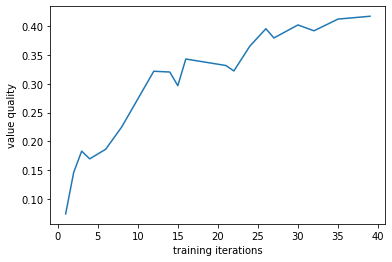

In [12]:
q_l=[]
iter_l = []
for i in np.arange(1,71,1):
    try:
        q_l.append(get_value_quality_one_iter_number(i))
        iter_l.append(i)
    except:
        print(f'no iter {i}')
fig,ax=plt.subplots()
# ax.plot(np.arange(1,71,1),q_l)
ax.plot(iter_l,q_l)
ax.set_xlabel('training iterations')
ax.set_ylabel('value quality')
fig.savefig('nnet_value_quality_t1mcts100cpuct2.jpg')

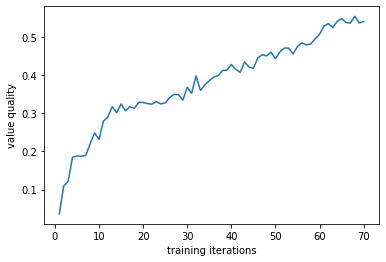

In [131]:
q_l=[]
iter_l = []
for i in np.arange(1,71,1):
    try:
        q_l.append(get_value_quality_one_iter_number(i))
        iter_l.append(l)
    except:
        print(f'no iter {i}')
fig,ax=plt.subplots()
# ax.plot(np.arange(1,71,1),q_l)
ax.plot(iter_l,q_l)
ax.set_xlabel('training iterations')
ax.set_ylabel('value quality')
fig.savefig('nnet_value_quality_64.pdf')

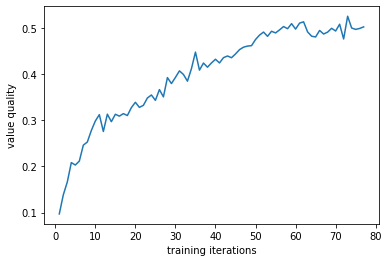

In [8]:
q_l=[]
for i in np.arange(1,78,1):
    q_l.append(get_value_quality_one_iter_number(i))
fig,ax=plt.subplots()
ax.plot(np.arange(1,78,1),q_l)
ax.set_xlabel('training iterations')
ax.set_ylabel('value quality')
fig.savefig('nnet_value_quality_18.pdf')

Text(0.5, 1.0, 'board not flipped by color')

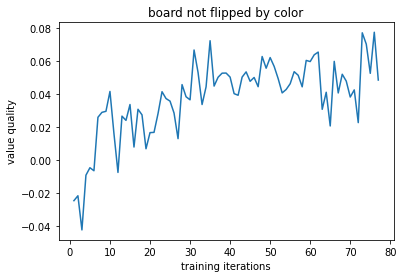

In [8]:
q_l=[]
for i in np.arange(1,78,1):
    q_l.append(get_value_quality_one_iter_number(i))
fig,ax=plt.subplots()
ax.plot(np.arange(1,78,1),q_l)
ax.set_xlabel('training iterations')
ax.set_ylabel('value quality')
ax.set_title('board not flipped by color')
# fig.savefig('nnet_value_quality_18.pdf')

In [4]:
game = Game(4,9,4)
board = game.getInitBoard()

In [5]:
a_l = np.array([1,2,3])
x_l = a_l //game.n
y_l = a_l %game.n
ind_l = np.arange(len(a_l))

In [9]:
index_batch = np.array([ind_l,x_l,y_l])

In [8]:
board_batch = np.tile(board,(3,1,1))

In [13]:
index_batch

array([[0, 1, 2],
       [0, 0, 0],
       [1, 2, 3]])

In [17]:
board_batch[ind_l,x_l,y_l] = 1

In [19]:
board_batch

array([[[0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [20]:
board

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
a = {('a',1):1,('b',2):2}